## Project
The goal of this project is to exercise the skills that we have learned in class for a region that we are interested in. For this project, we will be using CMIP6 data for our region of interest. 

#### Authors:
- Tom Gibbens-Matsuyama
- Ian Morris-Sibaja



### Load our modules

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import scipy.stats as stats
import numpy as np

## Introduction
Hawai'i. Write a few paragraphs for LATER

In [15]:
# Region of interest
lat_min, lat_max = 17.791918, 21.593726
lon_min, lon_max = - 164.510254, - 150.467773

### Metrics to Assess Climate Change
Metrics of interest would be regional averages (time serires plots) and Time averages for map plots. Variables of interest that are most relevant are sea surface temperature (TOS) and Precipitation (PR). 

### Extract Necessary Climate Data
Choosing historical and SSP585 for our models. Models are CanESM5 and 

In [16]:
# Load CMIP6 Catalog
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [17]:
# Specify search terms to query catalog 
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Two models for this exercise 
source_id = ['MPI-ESM1-2-HR', 'GFDL-ESM4']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp245']

table_id = "Omon"

member_id = ['r2i1p1f1', 'r2i1p1f3']

# variable_id: Sea Surface Temperature 
variable_id = 'tos' 

### View Potential Models

In [18]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, 
                     source_id=source_id,
                     experiment_id=experiment_ids,
                     table_id=table_id,
                     #member_id=member_id,
                     variable_id=variable_id
                    )

res = res.df
res

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r2i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
3,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
4,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r3i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
5,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
6,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701
7,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701
8,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701
9,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701


In [19]:
MPI = res[res["source_id"]=='MPI-ESM1-2-HR'].reset_index(drop=True)
ESM4 = res[res["source_id"]=='GFDL-ESM4'].reset_index(drop=True)

## Metrics Computation

### Narrow Down MPI Model to a Single Member ID

In [20]:
MPI = MPI[MPI['member_id']=='r1i1p1f1']
MPI

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
4,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
8,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710


In [21]:
hist_data_MPI = xr.open_zarr(MPI['zstore'][4], storage_options = {'anon':True})
proj_data_MPI = xr.open_zarr(MPI['zstore'][8], storage_options = {'anon':True})

### Narrow down ESM1 Model to a Single Member ID

In [22]:
ESM4 = ESM4[ESM4['member_id']=='r2i1p1f1']
ESM4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r2i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
3,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
6,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701
7,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701


In [23]:
# Store as Xarray
hist_data_ESM4 = xr.open_zarr(ESM4['zstore'][2], storage_options = {'anon':True})
proj_data_ESM4 = xr.open_zarr(ESM4['zstore'][6], storage_options = {'anon':True})

In [24]:
# Concatenate ESM4 data
ESM4_245 = xr.concat([hist_data_ESM4, proj_data_ESM4], dim = "time")
# Concatenate MPI data
MPI_245 = xr.concat([hist_data_MPI, proj_data_MPI], dim = 'time')

# Convert time to datetime64 format
time = ESM4_245.time.astype('datetime64[ns]')

time = MPI_245.time.astype('datetime64[ns]')

In [25]:
# Region of interest
lat_min, lat_max = 17.791918, 21.593726
lon_min, lon_max = 360 - 164.510254, 360 - 150.467773

### Define Mask 

In [33]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
ESM4_245_tos_mm_lat = (ESM4_245.lat >= lat_min) & (ESM4_245.lat <= lat_max)
ESM4_245_tos_mm_lon = (ESM4_245.lon >= lon_min) & (ESM4_245.lon <= lon_max)

MPI_245_tos_mm_lat = (MPI_245.latitude >= lat_min) & (MPI_245.latitude <= lat_max)
MPI_245_tos_mm_lon = (MPI_245.longitude >= lon_min) & (MPI_245.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_ESM4_mm = ESM4_245.where(ESM4_245_tos_mm_lat & ESM4_245_tos_mm_lon, drop = True)
tos_MPI_mm = MPI_245.where(MPI_245_tos_mm_lat & MPI_245_tos_mm_lon, drop = True)

tos_ESM4 = tos_ESM4_mm.mean(dim=['lat', 'lon'])
tos_MPI = tos_MPI_mm.mean(dim=['i', 'j'])

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


### Plot ESM1 Model: Time Series

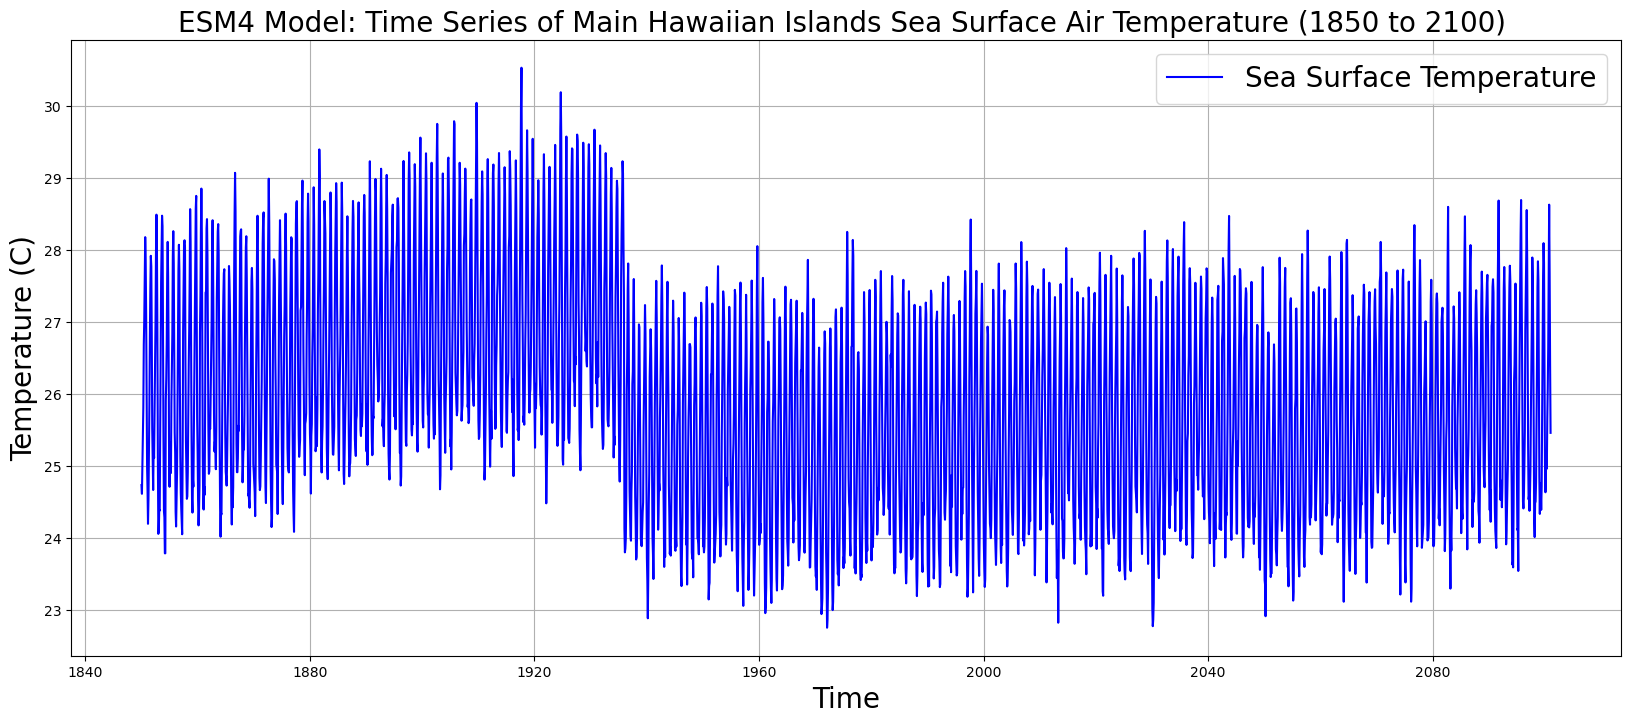

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_ESM4.tos, label='Sea Surface Temperature', color='b')
ax.set_title("ESM4 Model: Time Series of Main Hawaiian Islands Sea Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (C)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

### Plot MPI Model: Time Series

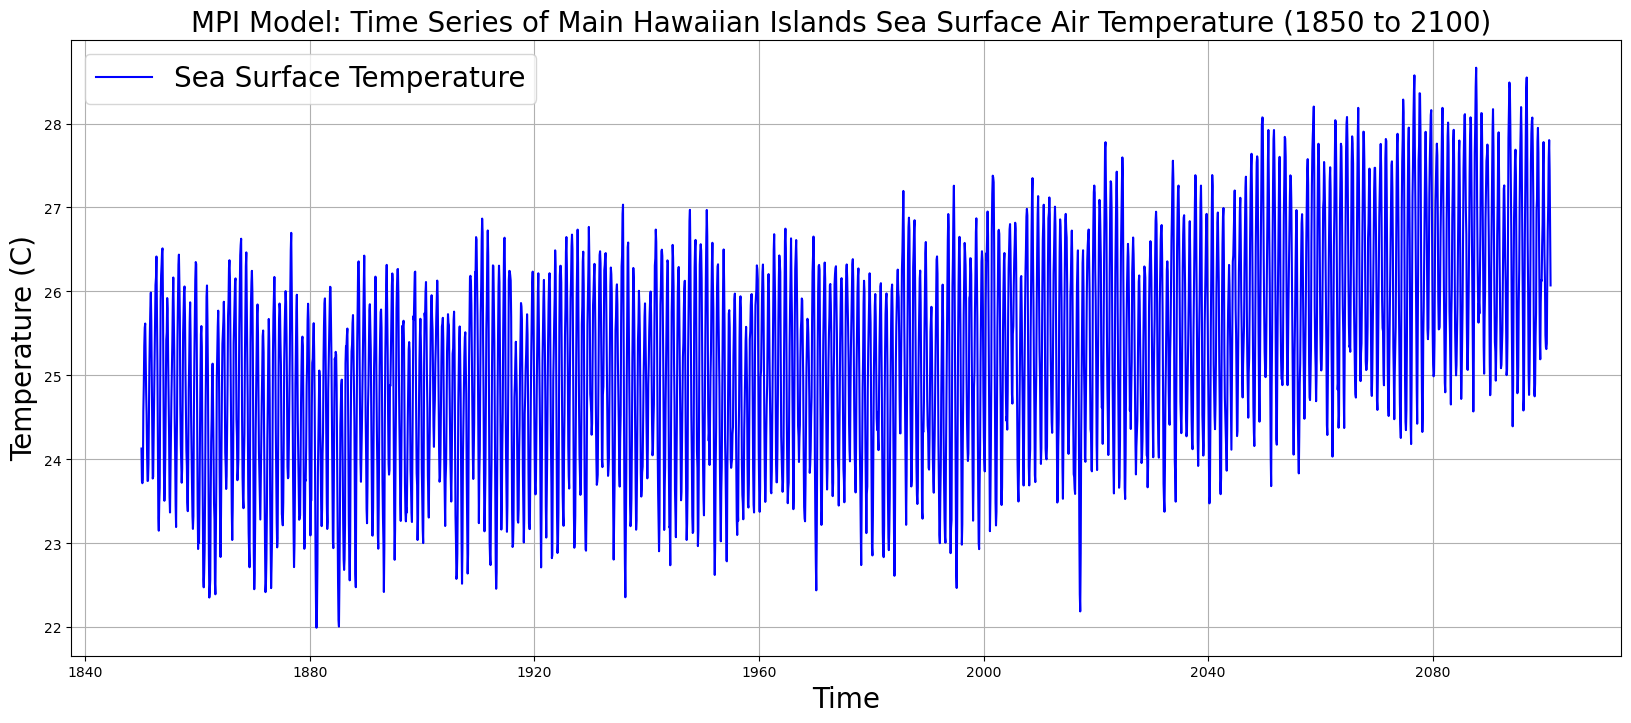

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_MPI.tos, label='Sea Surface Temperature', color='b')
ax.set_title("MPI Model: Time Series of Main Hawaiian Islands Sea Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (C)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

### Mapping Main Hawaiian Islands

In [53]:
# Concatenate ESM4 data
ESM4_245 = xr.concat([hist_data_ESM4, proj_data_ESM4], dim = "time")
# Concatenate MPI data
MPI_245 = xr.concat([hist_data_MPI, proj_data_MPI], dim = 'time')

In [54]:
# Region of interest
# lat_min, lat_max = 18.791918, 22.593726
# lon_min, lon_max = 360 - 160.510254, 360 - 154.467773

In [55]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
ESM4_245_tos_mm_lat = (ESM4_245.lat >= lat_min) & (ESM4_245.lat <= lat_max)
ESM4_245_tos_mm_lon = (ESM4_245.lon >= lon_min) & (ESM4_245.lon <= lon_max)

MPI_245_tos_mm_lat = (MPI_245.latitude >= lat_min) & (MPI_245.latitude <= lat_max)
MPI_245_tos_mm_lon = (MPI_245.longitude >= lon_min) & (MPI_245.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_ESM4_mm = ESM4_245.where(ESM4_245_tos_mm_lat & ESM4_245_tos_mm_lon, drop = True)
tos_MPI_mm = MPI_245.where(MPI_245_tos_mm_lat & MPI_245_tos_mm_lon, drop = True)

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [56]:
tos_ESM4_mm

<xarray.Dataset>
Dimensions:    (time: 3012, lat: 4, lon: 15, bnds: 2)
Coordinates:
  * lat        (lat) float64 18.5 19.5 20.5 21.5
    lat_bnds   (lat, bnds) float64 18.0 19.0 19.0 20.0 20.0 21.0 21.0 22.0
  * lon        (lon) float64 195.5 196.5 197.5 198.5 ... 206.5 207.5 208.5 209.5
    lon_bnds   (lon, bnds) float64 195.0 196.0 196.0 197.0 ... 209.0 209.0 210.0
  * time       (time) object 2015-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tos        (time, lat, lon) float32 dask.array<chunksize=(376, 4, 15), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/9ad940cc-03ed-4e3f-bd1f-aad445dd192b...
    variable_id:            tos
    variant_info:           N/A
    variant_label:          r2i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/9ad940cc-03ed-4e3f-bd1f-aad445dd192b...
    version_id:             v20180701

In [57]:
tos_MPI_mm

<xarray.Dataset>
Dimensions:             (time: 3012, j: 10, i: 31, vertices: 4, bnds: 2)
Coordinates:
  * i                   (i) int32 250 251 252 253 254 ... 276 277 278 279 280
  * j                   (j) int32 150 151 152 153 154 155 156 157 158 159
    latitude            (j, i) float64 22.22 22.2 22.18 ... 17.65 17.63 17.61
    longitude           (j, i) float64 195.8 196.2 196.7 ... 208.3 208.7 209.2
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12...
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: vertices, bnds
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(66, 10, 31), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(1980, 10, 31, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(1980, 10, 31, 4), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.5.0
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/ccd8388f-4f80-4a1e-ba47-66fe65bbeece...
    variable_id:            tos
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/ccd8388f-4f80-4a1e-ba47-66fe65bbeece...
    version_id:             v20190710

In [58]:
tos_MPI_mm_hist_mask = (tos_MPI_mm.time.dt.year >= 1850) & (tos_MPI_mm.time.dt.year <= 2015)
tos_MPI_mm_proj_mask = (tos_MPI_mm.time.dt.year >= 2015) & (tos_MPI_mm.time.dt.year <= 2100)

tos_ESM4_mm_hist_mask = (tos_ESM4_mm.time.dt.year >= 1850) & (tos_ESM4_mm.time.dt.year <= 2015)
tos_ESM4_mm_proj_mask = (tos_ESM4_mm.time.dt.year >= 2015) & (tos_ESM4_mm.time.dt.year <= 2100)

In [59]:

# Get data for an earlier period
ESM4_hist_mm = tos_ESM4_mm.sel(time=tos_ESM4_mm_hist_mask)
MPI_hist_mm = tos_MPI_mm.sel(time=tos_MPI_mm_hist_mask)

# Get data for a later period
ESM4_proj_mm = tos_ESM4_mm.sel(time=tos_ESM4_mm_proj_mask)
# Get data for a later period (corrected)
MPI_proj_mm = tos_MPI_mm.sel(time=tos_MPI_mm_proj_mask)

In [61]:
# Calculate the ensemble means
ESM4_hist_mm_mean = ESM4_hist_mm.mean(dim="time")

ESM4_proj_mm_mean = ESM4_proj_mm.mean(dim="time")

MPI_hist_mm_mean = MPI_hist_mm.mean(dim="time")

MPI_proj_mm_mean = MPI_proj_mm.mean(dim="time")

Text(0.5, 1.0, 'MPI TOS (projected)')

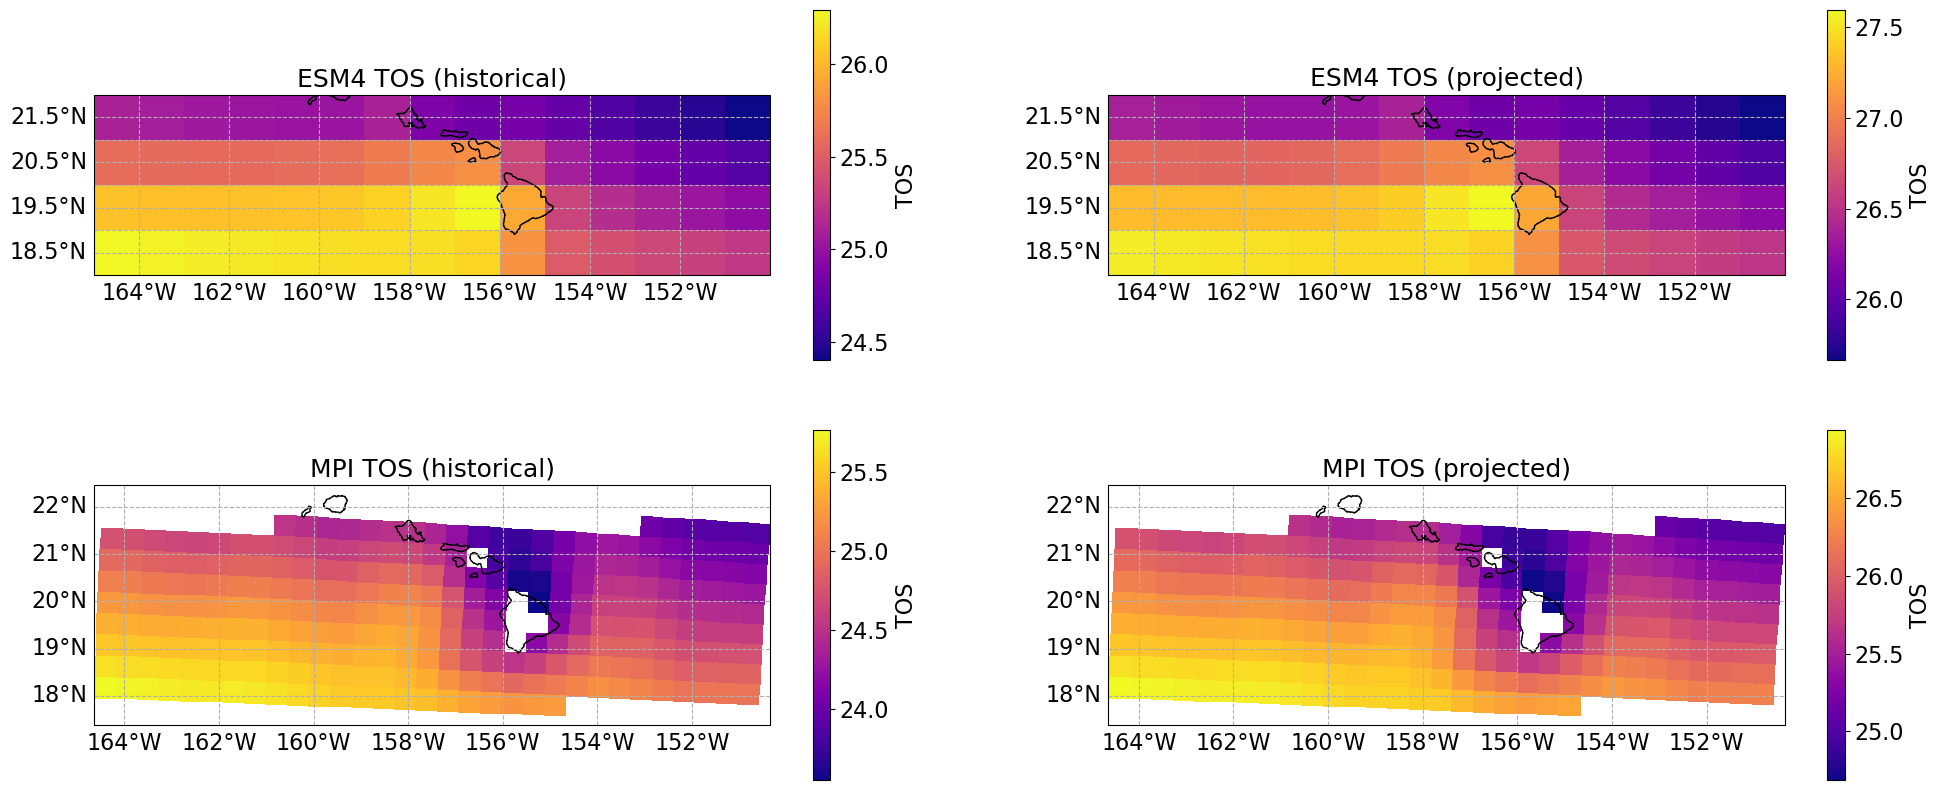

In [63]:
# historical and projected trends of the two models
map = ccrs.PlateCarree()

# Make a figure with four subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24, 10), subplot_kw={"projection": map})

# Subplot 1: ESM1 historical
plot1 = axes[0,0].pcolormesh(ESM4_hist_mm_mean.lon,
                           ESM4_hist_mm_mean.lat,
                           ESM4_hist_mm_mean.tos,
                           transform=map, cmap="plasma")

# Add coastlines, state borders, and gridlines
axes[0,0].add_feature(cfeature.COASTLINE)
axes[0,0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0,0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot1, ax=axes[0,0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0,0].set_title("ESM4 TOS (historical)", fontsize=18)

# Subplot 2: ESM1 projected
plot2 = axes[0,1].pcolormesh(ESM4_proj_mm_mean.lon,
                           ESM4_proj_mm_mean.lat,
                           ESM4_proj_mm_mean.tos,
                           transform=map, cmap="plasma")

# Add coastlines, state borders, and gridlines
axes[0,1].add_feature(cfeature.COASTLINE)
axes[0,1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0,1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot2, ax=axes[0,1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0,1].set_title("ESM4 TOS (projected)", fontsize=18)

# Subplot 3: MPI Historical
plot3 = axes[1,0].pcolormesh(MPI_hist_mm_mean.longitude,
                           MPI_hist_mm_mean.latitude,
                           MPI_hist_mm_mean.tos,
                           transform=map, cmap="plasma")

# Add coastlines, state borders, and gridlines
axes[1,0].add_feature(cfeature.COASTLINE)
axes[1,0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1,0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot3, ax=axes[1,0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1,0].set_title("MPI TOS (historical)", fontsize=18)

# Subplot 2: MPI
plot4 = axes[1,1].pcolormesh(MPI_proj_mm_mean.longitude,
                           MPI_proj_mm_mean.latitude,
                           MPI_proj_mm_mean.tos,
                           transform=map, cmap="plasma")

# Add coastlines, state borders, and gridlines
axes[1,1].add_feature(cfeature.COASTLINE)
axes[1,1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1,1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot4, ax=axes[1,1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1,1].set_title("MPI TOS (projected)", fontsize=18)

In [48]:
# Calculate the differences
ESM4_diff_mm = ESM4_proj_mm.mean(dim="time") - ESM4_hist_mm.mean(dim="time")
MPI_diff_mm = MPI_proj_mm.mean(dim="time") - MPI_hist_mm.mean(dim="time")

In [49]:
# Calculate the ensemble means
ESM4_diff_mm_mean = ESM4_diff_mm.mean(dim="member")
MPI_diff_mm_mean = MPI_diff_mm.mean(dim="member")

Text(0.5, 1.0, 'MPI TOS (late-century - historical)')

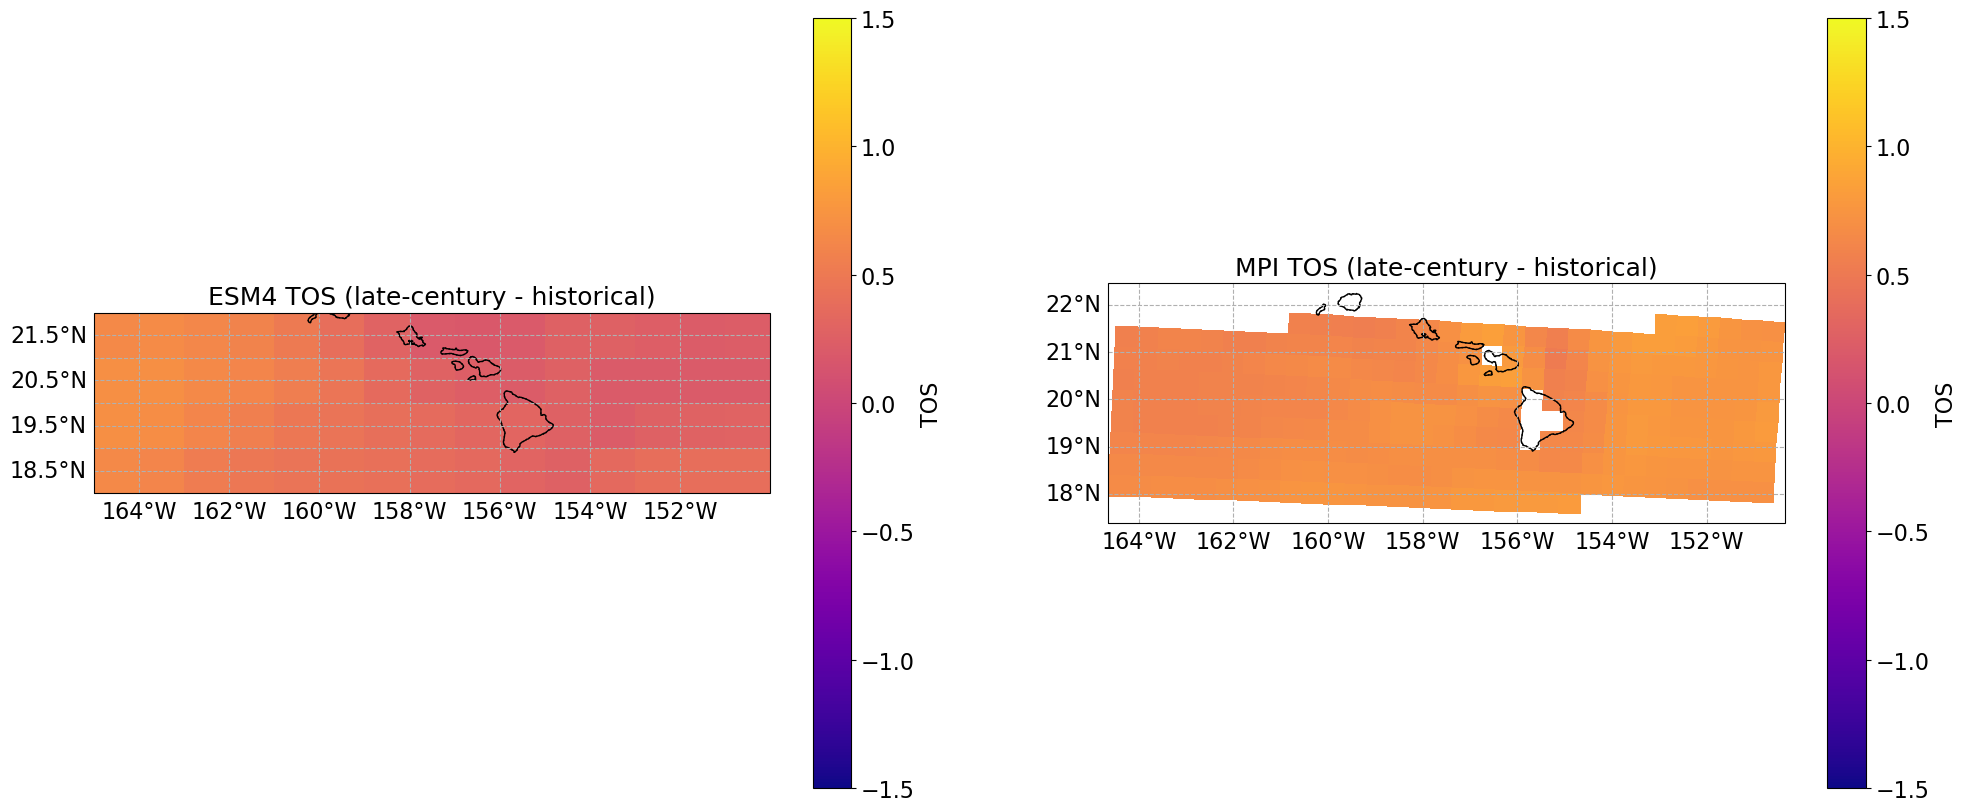

In [64]:
map = ccrs.PlateCarree()

# Make a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(24, 10), subplot_kw={"projection": map})

# Subplot 1: ESM1
plot1 = axes[0].pcolormesh(ESM4_diff_mm_mean.lon,
                           ESM4_diff_mm_mean.lat,
                           ESM4_diff_mm_mean.tos,
                           transform=map, cmap="plasma", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot1, ax=axes[0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0].set_title("ESM4 TOS (late-century - historical)", fontsize=18)

# Subplot 2: MPI
plot2 = axes[1].pcolormesh(MPI_diff_mm_mean.longitude,
                           MPI_diff_mm_mean.latitude,
                           MPI_diff_mm_mean.tos,
                           transform=map, cmap="plasma", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot2, ax=axes[1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1].set_title("MPI TOS (late-century - historical)", fontsize=18)

### Conlusions